# Computational Methods in Ordinary Differential Equations

*Dr Jon Shiach, Department of Computing and Mathematics, Manchester Metropolitan University*

---
# Solutions to Tutorials Exercises

1. [Initial Value Problems](#Initial-Value-Problems)
1. [Direct Methods](#Direct-Methods)

---
## Initial Value Problems

1. 


| $t$ | $y$ |
|:--:|:--:|
| 0.0 | 1.0000 |
| 0.4 | 1.0000 |
| 0.8 | 1.1600 |
| 1.2 | 1.5312 |
| 1.6 | 2.2662 |
| 2.0 | 3.7165 |

2. Reproduce your solutions to question 1 using Python.

In [8]:
%matplotlib inline
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

def euler(f, tspan, y0, h):
    '''
    Calculuates the solution to an IVP using the Euler method
    '''

    # Initialise solution arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0

    # Solver loop
    for n in range(nsteps):
        y[n + 1] = y[n] + h * f(t[n], y[n])
        t[n + 1] = t[n] + h

    return t, y

# Define ODE function
def f(t, y):
    return  t*y

# Define IVP parameters
tspan = [ 0, 2 ]
y0 = 1
h = 0.4

# Solve IVP using the Euler method
t, y = euler(f, tspan, y0, h)

# Output solution table
table = Table([t, y], names=('t', 'Euler'))
table['t'].info.format = '0.1f'
table['Euler'].info.format = '0.4f'
print(table)

 t  Euler 
--- ------
0.0 1.0000
0.4 1.0000
0.8 1.1600
1.2 1.5312
1.6 2.2662
2.0 3.7165


3. . The exact solution to the IVP in question 1 is $y=e^{\frac{1}{2}t^2}$. Produce a plot of the Euler solution from question 2 against the exact solution.

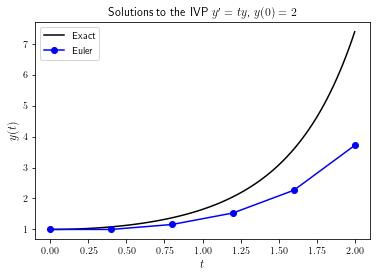

In [10]:
def exact_sol(t):
    return np.exp(0.5 * t**2)

# Plot solution
fig, ax = plt.subplots()

t1 = np.linspace(tspan[0], tspan[1], 100)
ax.plot(t1, exact_sol(t1), 'k-', label='Exact')
ax.plot(t, y, 'bo-', label='Euler')
ax.set_title("Solutions to the IVP $y'=ty$, $y(0)=2$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

---
## Direct Methods

1. 
&emsp; (a) $L = \begin{pmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ 0 & 1 & 1 \end{pmatrix},
U = \begin{pmatrix} 2 & 3 & -1 \\ 0 & 3 & 1 \\ 0 & 0 & 1 \end{pmatrix},
\mathbf{x} = \begin{pmatrix} -2 \\ 3 \\ 1 \end{pmatrix}.$
<br><br>
&emsp; (b) $L = \begin{pmatrix} 1 & 0 & 0 \\ 1/3 & 1 & 0 \\ 2/3 & 2 & 1 \end{pmatrix},
U = \begin{pmatrix} 3 & 9 & 5 \\ 0 & -1 & 1/3 \\ 0 & 0 & 1 \end{pmatrix},
\mathbf{x} = \begin{pmatrix} 1 \\ 3 \\ -2 \end{pmatrix}.$
<br><br>
&emsp; (c) $L = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 3 & 1 & 0 & 0 \\ 4 & 1/2 & 1 & 0 \\ 0 & -1 & 1/3 & 1 \end{pmatrix},
    U = \begin{pmatrix} 1 & 0 & 3 & 2 \\ 0 & -2 & -4 & -5 \\ 0 & 0 & -12 & 17/2 \\ 0 & 0 & 0 & 5/6 \end{pmatrix},
    \mathbf{x} = \begin{pmatrix} 2 \\ -1 \\ 3 \\ 5 \end{pmatrix}.$
<br><br>
&emsp; (d) $L = \begin{pmatrix} 1 & 0 & 0 & 0 \\ -2 & 1 & 0 & 0 \\ 3 & -7/3 & 1 & 0 \\ -3 & 2 & -1/3 & 1 \end{pmatrix},
U = \begin{pmatrix} 1 & 5 & 2 & 2 \\ 0 & 6 & 6 & 4 \\ 0 & 0 & 6 & 7/3 \\ 0 & 0 & 0 &  20/9 \end{pmatrix}, 
\mathbf{x} = \begin{pmatrix} 1 \\ -3 \\ 0 \\ 2 \end{pmatrix}.$
<br><br> 

3. &emsp; (a) $P = \begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \end{pmatrix}$, 
$L = \begin{pmatrix} 1 & 0 & 0 \\ 1/2 & 1 & 0 \\ 0 & -2 & 1 \end{pmatrix}$,
$U = \begin{pmatrix} 4 & 9 & -1 \\ 0 & -3/2 & -1/2 \\ 0 & 0 & 1 \end{pmatrix}$, 
$\mathbf{x} = \begin{pmatrix} -2 \\ 3 \\ 1 \end{pmatrix}$.
<br>
&emsp; (b) $P = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 1 & 0 \end{pmatrix}$, 
$L = \begin{pmatrix} 1 & 0 & 0 \\ 2/3 & 1 & 0 \\ 1/3 & 1/2 & 1 \end{pmatrix}$,
$U = \begin{pmatrix} 3 & 9 & 5 \\ 0 & -2 & 5/3 \\ 0 & 0 & -1/2 \end{pmatrix}$, 
$\mathbf{x} = \begin{pmatrix} 1 \\ 3 \\ -2 \end{pmatrix}$.
<br><br>
&emsp; (c) $P = \begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}$, 
$L = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 3/4 & 1 & 0 & 0 \\ 1/3 & -1/5 & 1 & 0 \\ 0 & -8/5 & 13/6 & 1 \end{pmatrix}$,
$U = \begin{pmatrix} 4 & -1 & -2 & -3 \\ 0 & -5/4 & 13/2 & 7/4 \\ 0 & 0 & 24/5 & 17/4 \\ 0 & 0 & 0 & 5/6 \end{pmatrix}$, 
$\mathbf{x} = \begin{pmatrix} 2 \\ -1 \\ 3 \\ 5 \end{pmatrix}$.
<br><br>
&emsp; (d) $P = \begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 1 & 0 & 0 & 0 \end{pmatrix}$, 
$L = \begin{pmatrix} 1 & 0 & 0 & 0 \\ -2/3 & 1 & 0 & 0 \\ -1 & 3/5 & 1 & 0 \\ 1/3 & -7/5 & 9/4 & 1\end{pmatrix}$,
$U = \begin{pmatrix} 3 & 1 & -2 & -1 \\ 0 & -10/3 & 2/3 & -2/3 \\ 0 & 0 & 8/5 & -8/5 \\ 0 & 0 & 0 & 5  \end{pmatrix}$, 
$\mathbf{x} = \begin{pmatrix} 1 \\ -3 \\ 0 \\ 2 \end{pmatrix}$.
<br><br>

3. &emsp; (a) $L = \begin{pmatrix} 4 & 0 & 0 \\ 4 & 3 & 0 \\ 1 & 2 & 1 \end{pmatrix}$, 
$\mathbf{x} = \begin{pmatrix} 3 \\ -3 \\ -2 \end{pmatrix}$.
<br><br>
&emsp; (b) $L = \begin{pmatrix} 2 & 0 & 0 \\ 1 & 4 & 0 \\ 4 & 4 & 3 \end{pmatrix}$, 
$\mathbf{x} = \begin{pmatrix} 5 \\ 0 \\ 2 \end{pmatrix}$.
<br><br>
&emsp; (c) $L = \begin{pmatrix} 3 & 0 & 0 & 0 \\ -3 & 4 & 0 & 0 \\ 0 & 2 & 2 & 0 \\ -2 & -4 & -3 & 1 \end{pmatrix}$, 
$\mathbf{x} = \begin{pmatrix} -2 \\ -4 \\ -3 \\ 1 \end{pmatrix}$.
<br><br>
&emsp; (d) $L = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 5 & 2 & 0 & 0 \\ -1 & 4 & 5 & 0 \\ 2 & 1 & -3 & 5 \end{pmatrix}$, 
$\mathbf{x} = \begin{pmatrix} -2 \\ 4 \\ 0 \\ -2 \end{pmatrix}$.
<br><br>

3. &emsp; (a) $Q = \begin{pmatrix} \sqrt{2}/2 & \sqrt{2}/2 \\ -\sqrt{2}/2 & \sqrt{2}/2 \end{pmatrix}$, 
$R = \begin{pmatrix} \sqrt{2} & \sqrt{2}/2 \\ 0 & \sqrt{2}/2 \end{pmatrix}$, 
$\mathbf{x} = \begin{pmatrix} 5 \\ 4 \end{pmatrix}$.
<br><br>
&emsp; (b) $Q = \begin{pmatrix} 6/7 & -3/7 & -3/7 \\ 3/7 & 6/7 & 2/7 \\ 2/7 & -3/7 & 6/7 \end{pmatrix}$,
$R = \begin{pmatrix} 7 & 8 & 11/7 \\ 0 & 3 & 1/7 \\ 0 & 0 & 5/7 \end{pmatrix}$,
$\mathbf{x} = \begin{pmatrix} 1 \\ -1 \\ 3 \end{pmatrix}$.
<br><br>
&emsp; (c) $Q = \begin{pmatrix} 1/2 & 1/6 & -\sqrt{2}/3 \\ 1/2 & 1/2 & \sqrt{2}/2 \\ 1/2 & -5/6 & \sqrt{2}/6 \\ 1/2 & 1/6 & -\sqrt{2}/3 \end{pmatrix}$,
$R = \begin{pmatrix} 2 & 2 & 11/2 \\ 0 & 6 & -19/6 \\ 0 & 0 & 11\sqrt{2}/6 \end{pmatrix}$,
$\mathbf{x} = \begin{pmatrix} -62/11 \\ 47/22 \\ 15/11 \end{pmatrix}$.